In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [2]:
np.random.seed(1)
N = 20
xa = np.random.uniform(1, 3, size=N).round(2)
ya = np.random.uniform(1, 3, size=N).round(2)

xb = np.random.uniform(3, 5, size=N).round(2)
yb = np.random.uniform(3, 5, size=N).round(2)

In [3]:
dataset = np.vstack((
    np.hstack((np.array((xa, ya)).T, np.zeros((N, 1)))),
    np.hstack((np.array((xb, yb)).T, np.ones((N, 1))))
))
dataset

array([[1.83, 2.6 , 0.  ],
       [2.44, 2.94, 0.  ],
       [1.  , 1.63, 0.  ],
       [1.6 , 2.38, 0.  ],
       [1.29, 2.75, 0.  ],
       [1.18, 2.79, 0.  ],
       [1.37, 1.17, 0.  ],
       [1.69, 1.08, 0.  ],
       [1.79, 1.34, 0.  ],
       [2.08, 2.76, 0.  ],
       [1.84, 1.2 , 0.  ],
       [2.37, 1.84, 0.  ],
       [1.41, 2.92, 0.  ],
       [2.76, 2.07, 0.  ],
       [1.05, 2.38, 0.  ],
       [2.34, 1.63, 0.  ],
       [1.83, 2.37, 0.  ],
       [2.12, 2.67, 0.  ],
       [1.28, 1.04, 0.  ],
       [1.4 , 2.5 , 0.  ],
       [4.98, 3.2 , 1.  ],
       [4.5 , 3.83, 1.  ],
       [3.56, 4.39, 1.  ],
       [4.58, 3.83, 1.  ],
       [3.21, 3.1 , 1.  ],
       [3.9 , 4.07, 1.  ],
       [4.82, 4.33, 1.  ],
       [3.59, 4.03, 1.  ],
       [3.58, 4.89, 1.  ],
       [3.26, 4.17, 1.  ],
       [3.04, 4.81, 1.  ],
       [4.36, 3.27, 1.  ],
       [3.42, 3.28, 1.  ],
       [3.53, 4.61, 1.  ],
       [3.98, 3.8 , 1.  ],
       [3.11, 3.33, 1.  ],
       [4.15, 4.86, 1.  ],
 

In [4]:
new_point = [3, 3]

In [5]:
distances = []
for i in range(dataset.shape[0]):
    row = dataset[i]
    x1 = new_point[0]
    y1 = new_point[1]
    x2, y2, category = row

    d = np.sqrt(((x2 - x1) ** 2 + (y2 - y1) ** 2))
    distances.append({"distance": d, "category": category, "point": (x2, y2)})

In [6]:
K = 2
distances.sort(key=lambda d: d["distance"])
neighbors = distances[:K]
neighbors_cats = [n["category"] for n in neighbors]
predicted_cat = max(neighbors_cats, key=neighbors_cats.count)
predicted_cat

np.float64(1.0)

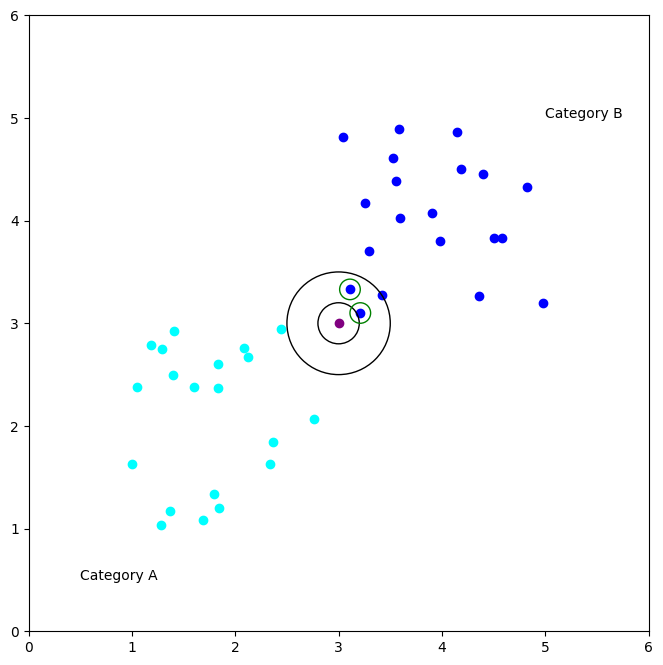

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.set_xlim(0, 6)
ax.set_ylim(0, 6)
ax.scatter(xa, ya, color = "cyan")
ax.text(.5, .5, "Category A")
ax.scatter(xb, yb, color = "blue")
ax.text(5, 5, "Category B")

ax.scatter(new_point[0], new_point[1], color = "purple")

circle_inner = plt.Circle((new_point[0], new_point[1]), radius=0.2, color = "black", fill=False)
ax.add_patch(circle_inner)

circle_outer = plt.Circle((new_point[0], new_point[1]), radius=0.5, color = "black", fill=False)
ax.add_patch(circle_outer)

for n in neighbors:
    circle_closest = plt.Circle(n["point"], radius = 0.1, color="green", fill=False)
    ax.add_patch(circle_closest)

plt.show()

In [8]:
model = KNeighborsClassifier(2)

model.fit(dataset[:,0:-1], dataset[:,-1])

KNeighborsClassifier(n_neighbors=2)

In [9]:
model.predict([new_point])

array([1.])